# PHYS 555 Project 
Name: Mukesh Aryal

Student ID: V00977403

# Part 4


# Objective 

The fourth part focuses on classifying the images into three classes: BACTERIAL, NORMAL and VIRAL using VGG16 pretrained model. The goal of this part is to check whether we can still get higher accuracy using VGG16 network that was not possible from the simple CNN network in part 3. The outcome of this section will shed more light on the poor performance of the simple CNN whether it was the issue of complexity.

In [ ]:
# libraries
import os
import glob
import shutil

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Getting the data 



In [ ]:
# getting the data
!wget -nc https://data.mendeley.com/public-files/datasets/rscbjbr9sj/files/f12eaf6d-6023-432f-acc9-80c9d7393433/file_downloaded 


File ‘file_downloaded’ already there; not retrieving.



# About the image dataset
The dataset contains chest x-ray images of normal people and people with Pneumonia. The images are not of uniform size. The dataset contains images labelled as normal, viral and bacterial cases but they are not sorted in particular folders. The dataset is only sorted into training and test folders by being grouped into two categories: NORMAL and PNEUMONIA. The dataset is imbalanced; hence, balancing is required. 

Chest X-ray images available were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care. There are 5856 images. The dataset is also availabe in *Kaggle*. 

The features that separate three classes are regions of abnormal opacification. The opacification are caused by consolidation in lungs. When parts of the lungs are filled with some fluid, pus, blood or water, it is detected in x-ray images as white regions instead of usual dark segment of lungs. The dark regions in x-ray images of lungs signifies that the lungs are filled with air as it should be. 

For normal cases, there are no signs of abnormal opacification and the images show smooth dark region of lungs. For bacterial cases, images exhibit a *localized* segment of consolidation in either lobe of the lungs. The viral case differs from bacterial case as the images of this case show more *diffusive* interstitial pattern in both lungs. 

In [ ]:
# unzipping the file. 
# skips unzipping if the folder already exists. 

if not os.path.exists('chest_xray') :
  ! unzip -n file_downloaded
else:
  print("Files should already be unzipped.")

Files should already be unzipped.


In [ ]:
# Check the total number of images
folder_name = 'chest_xray'
all_files = glob.glob(folder_name+"/**/*.jpeg",recursive=True)
print(f"Total number of images: {len(all_files)}")

Total number of images: 5856


# Create balanced dataset of three classes for multiclass classification
Copying equal images into three folders: BACTERIAL, NORMAL, and VIRAL

In [ ]:
# Define helper functions to complete sorting images into new directories! 
def make_folder(category,folder_name):
  if not os.path.exists(folder_name+'/test/'+ category):
    os.makedirs(folder_name+'/test/'+ category)
  if not os.path.exists(folder_name+'/train/'+ category):
    os.makedirs(folder_name+'/train/'+ category)
  if not os.path.exists(folder_name+'/val/'+ category):
    os.makedirs(folder_name+'/val/'+ category)

def sort_to_folder(file,folder_name,count,train_lim, val_lim,test_lim,assign_to):
    count += 1
    if (count <= train_lim):
      shutil.copy(file,folder_name+"/train/"+ assign_to)
    elif((count > train_lim) & (count <= val_lim)):
      shutil.copy(file,folder_name+"/val/" + assign_to)
    elif((count > val_lim) & (count <= test_lim)):
      shutil.copy(file,folder_name+"/test/" + assign_to)
    return count

def print_num_of_files(class_name,folder_name):
  train_normal_dir = os.listdir(folder_name+"/train/"+ class_name)
  train_num = len(train_normal_dir)

  test_normal_dir = os.listdir(folder_name+"/test/" + class_name)
  test_num = len(test_normal_dir)

  val_normal_dir = os.listdir(folder_name+"/val/" + class_name)
  val_num = len(val_normal_dir)
  print(f"Number of {class_name} cases in the folder train: {train_num}, test: {test_num}, val: {val_num}")
  print("-"*100)
  return train_num, test_num, val_num

In [ ]:
#! rm -rf Balanced_data

# Making a new directories of balanced data for 3 classes classification by copying the data from chest-xray

Equal number of bacterial, normal and viral cases were included in each folder to ensure that we have balanced dataset.

In [ ]:
# Set number of classes
num_classes = 3

# make new directories first
folder_name = "Multiclass_data"
make_folder('NORMAL',folder_name)
make_folder('VIRAL', folder_name)
make_folder('BACTERIAL', folder_name)

# Copy balanced number of images to the folder
image_inside = glob.glob(folder_name+"/**/*.jpeg",recursive=True)
if (len(image_inside)==0):
  balance_train = 600
  balance_val = 600+75
  balance_test = 600+75+75
  data_1 = []
  normal_count = 0
  viral_count = 0
  bact_count = 0
  for file in all_files:
    file_name = os.path.basename(file)
    if ('virus' in file_name):
      data_1.append([file,1])
      viral_count = sort_to_folder(file,folder_name, viral_count,balance_train,balance_val,balance_test,"BACTERIAL")
      #print(viral_counter)
      
    elif('bacteria' in file_name):
      data_1.append([file,2])
      bact_count = sort_to_folder(file, folder_name, bact_count,balance_train,balance_val,balance_test,"VIRAL")    
      
    else:
      data_1.append([file,0])
      normal_count = sort_to_folder(file,folder_name, normal_count, balance_train,balance_val,balance_test,"NORMAL")
else:
  print(f"Image file already present in the directory. Skipping sorting! The number of images present in the folder: {len(image_inside)}")

Image file already present in the directory. Skipping sorting! The number of images present in the folder: 2250


In [ ]:
# Check the number of images in each folder/class
norm_train_num, norm_test_num, norm_val_num = print_num_of_files("NORMAL",folder_name)
viral_num, viral_test_num, viral_val_num = print_num_of_files("VIRAL",folder_name)
bact_num, bact_test_num, bact_val_num = print_num_of_files("BACTERIAL",folder_name)

Number of NORMAL cases in the folder train: 600, test: 75, val: 75
----------------------------------------------------------------------------------------------------
Number of VIRAL cases in the folder train: 600, test: 75, val: 75
----------------------------------------------------------------------------------------------------
Number of BACTERIAL cases in the folder train: 600, test: 75, val: 75
----------------------------------------------------------------------------------------------------


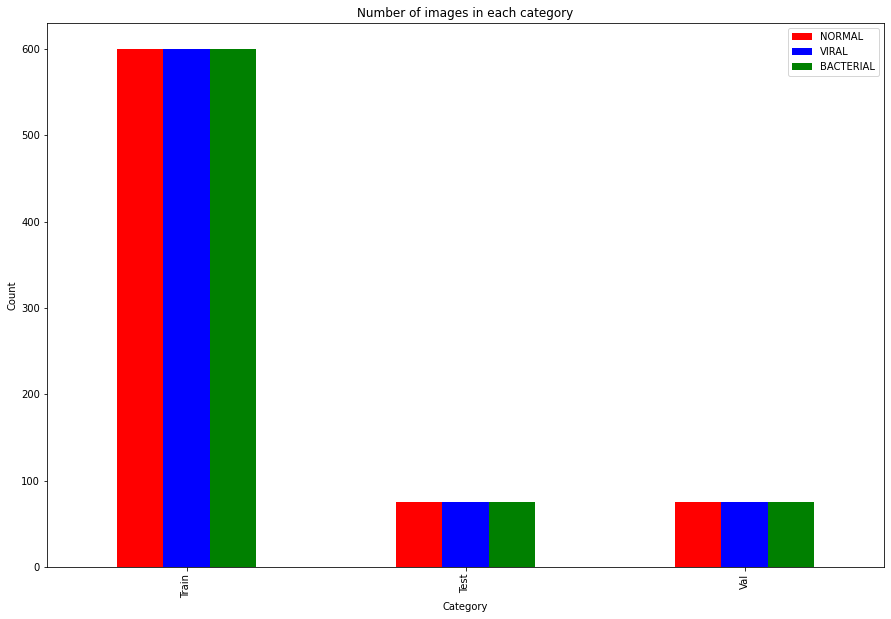

In [ ]:
# Visualizing the distribution of images in different classes! 
df = pd.DataFrame({
    'NORMAL' : [norm_train_num, norm_test_num, norm_val_num],
    'VIRAL': [viral_num, viral_test_num, viral_val_num],
    'BACTERIAL': [bact_num, bact_test_num, bact_val_num]},
    index = ['Train','Test','Val']
)

df.plot(kind = 'bar', stacked = False, color = ['red','blue','green'],figsize = (15,10))
plt.title("Number of images in each category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

# Importing torch and making necessary transforms. 

In [ ]:
# Importing torch and other necessary libraries

import torch
import torchvision
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
from torch.utils.data.dataloader import DataLoader
from torchvision.utils import make_grid
import torch.nn as nn
import torch.nn.functional as F


# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: {device}") 

Device: cpu


In [ ]:
train_dir = folder_name+"/train"
val_dir = folder_name+"/val"
test_dir = folder_name+"/test"

In [ ]:
# Define the transfer
trans = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
])

In [ ]:
train_set = ImageFolder(train_dir,trans)
val_set = ImageFolder(val_dir,trans)
test_set = ImageFolder(test_dir,trans)

In [ ]:
# make a quick check
img,label = train_set[200]
print(img.shape,label)
print(f"Images in training set: {len(train_set)}, images in val set: {len(val_set)}, images in test set: {len(test_set)}")

torch.Size([3, 64, 64]) 0
Images in training set: 1800, images in val set: 225, images in test set: 225


# Early stopping class
This class makes sure that we are not overfitting the model. It makes a checkpoint and saves the model everytime the validation loss is decreased as the training loss decreases. If validation loss starts increasing, insinuating overfitting, a counter records the times validation loss increases and stops the training process to avoid overfitting after reaching the patience limit. 


In [ ]:
class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
                            Default: 7
            verbose (bool): If True, prints a message for each validation loss improvement. 
                            Default: False
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
                            Default: 0
            path (str): Path for the checkpoint to be saved to.
                            Default: 'checkpoint.pt'
            trace_func (function): trace print function.
                            Default: print            
        """
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func
    def __call__(self, val_loss, model):

        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        '''Saves model when validation loss decrease.'''
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [ ]:
# Data loader 
batch_size = 64
train_loader = DataLoader(train_set,batch_size = batch_size, shuffle = True)
test_loader = DataLoader(test_set,batch_size = batch_size, shuffle = True)
valid_loader = DataLoader(val_set,batch_size = batch_size,shuffle = True)

# **Fourth Part!!**
# Transfer learning with VGG16

In [ ]:
# import the model and print it
import torchvision.models as models

model = models.vgg16(pretrained=True,progress=True)
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# Freezing the Convolutional block and modifying the final layer of the classifier

model = models.vgg16(pretrained=True,progress=True)

for i in range(31):
  print(i)
  print(model.features[i])
  for param in (model.features[i].parameters()):
    param.requires_grad = False
  print("-"*50)

0
Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
--------------------------------------------------
1
ReLU(inplace=True)
--------------------------------------------------
2
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
--------------------------------------------------
3
ReLU(inplace=True)
--------------------------------------------------
4
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
--------------------------------------------------
5
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
--------------------------------------------------
6
ReLU(inplace=True)
--------------------------------------------------
7
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
--------------------------------------------------
8
ReLU(inplace=True)
--------------------------------------------------
9
MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
-----------------------------

In [ ]:
# Modifying the output of the classifier and specifying the loss function! 

model.classifier[6] = nn.Linear(4096,num_classes)

print(model)

lr_rate = 0.001

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.Adam(model.parameters(),lr = lr_rate)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# Training function that includes early stopping

def train_model(model, batch_size, patience, n_epochs):
    
    # to track the training loss as the model trains
    train_losses = []
    # to track the validation loss as the model trains
    valid_losses = []
    # to track the average training loss per epoch as the model trains
    avg_train_losses = []
    # to track the average validation loss per epoch as the model trains
    avg_valid_losses = [] 
    
    # initialize the early_stopping object
    early_stopping = EarlyStopping(patience=patience, verbose=True)
    
    for epoch in range(1, n_epochs + 1):

        ###################
        # train the model #
        ###################
        model.train() # prep model for training
        for batch, (data, target) in enumerate(train_loader, 1):
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # backward pass: compute gradient of the loss with respect to model parameters
            loss.backward()
            # perform a single optimization step (parameter update)
            optimizer.step()
            # record training loss
            train_losses.append(loss.item())

        ######################    
        # validate the model #
        ######################
        model.eval() # prep model for evaluation
        for data, target in valid_loader:
            # forward pass: compute predicted outputs by passing inputs to the model
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # record validation loss
            valid_losses.append(loss.item())

        # print training/validation statistics 
        # calculate average loss over an epoch
        train_loss = np.average(train_losses)
        valid_loss = np.average(valid_losses)
        avg_train_losses.append(train_loss)
        avg_valid_losses.append(valid_loss)
        
        epoch_len = len(str(n_epochs))
        
        print_msg = (f'[{epoch:>{epoch_len}}/{n_epochs:>{epoch_len}}] ' +
                     f'train_loss: {train_loss:.5f} ' +
                     f'valid_loss: {valid_loss:.5f}')
        
        print(print_msg)
        
        # clear lists to track next epoch
        train_losses = []
        valid_losses = []
        
        # early_stopping needs the validation loss to check if it has decresed, 
        # and if it has, it will make a checkpoint of the current model
        early_stopping(valid_loss, model)
        
        if early_stopping.early_stop:
            print("Early stopping")
            break
        
    # load the last checkpoint with the best model
    model.load_state_dict(torch.load('checkpoint.pt'))

    return  model, avg_train_losses, avg_valid_losses

In [ ]:
n_epochs = 50
patience = 8

model, train_loss, valid_loss = train_model(model,batch_size,patience,n_epochs)

[ 1/50] train_loss: 1.32444 valid_loss: 0.68789
Validation loss decreased (inf --> 0.687887).  Saving model ...
[ 2/50] train_loss: 0.76422 valid_loss: 0.51713
Validation loss decreased (0.687887 --> 0.517130).  Saving model ...
[ 3/50] train_loss: 0.68921 valid_loss: 0.56267
EarlyStopping counter: 1 out of 8
[ 4/50] train_loss: 0.64871 valid_loss: 0.51974
EarlyStopping counter: 2 out of 8
[ 5/50] train_loss: 0.67352 valid_loss: 0.53671
EarlyStopping counter: 3 out of 8
[ 6/50] train_loss: 0.63277 valid_loss: 0.47614
Validation loss decreased (0.517130 --> 0.476135).  Saving model ...
[ 7/50] train_loss: 0.59314 valid_loss: 0.48505
EarlyStopping counter: 1 out of 8
[ 8/50] train_loss: 0.60445 valid_loss: 0.79484
EarlyStopping counter: 2 out of 8
[ 9/50] train_loss: 0.59574 valid_loss: 0.68187
EarlyStopping counter: 3 out of 8
[10/50] train_loss: 0.76145 valid_loss: 0.95086
EarlyStopping counter: 4 out of 8
[11/50] train_loss: 0.96317 valid_loss: 0.48913
EarlyStopping counter: 5 out of 

In [ ]:
# visualize the loss as the network trained
def plot_loss_vs_epoch():
  fig = plt.figure(figsize=(10,8))
  plt.plot(range(1,len(train_loss)+1),train_loss, label='Training Loss')
  plt.plot(range(1,len(valid_loss)+1),valid_loss,label='Validation Loss')

  # find position of lowest validation loss
  minposs = valid_loss.index(min(valid_loss))+1 
  plt.axvline(minposs, linestyle='--', color='r',label='Early Stopping Checkpoint')

  plt.xlabel('epochs')
  plt.ylabel('loss')
  #plt.ylim(0, 0.5) # consistent scale
  plt.xlim(0, len(train_loss)+1) # consistent scale
  plt.grid(True)
  plt.legend()
  plt.tight_layout()
  plt.show()
  fig.savefig('loss_plot.png', bbox_inches='tight')

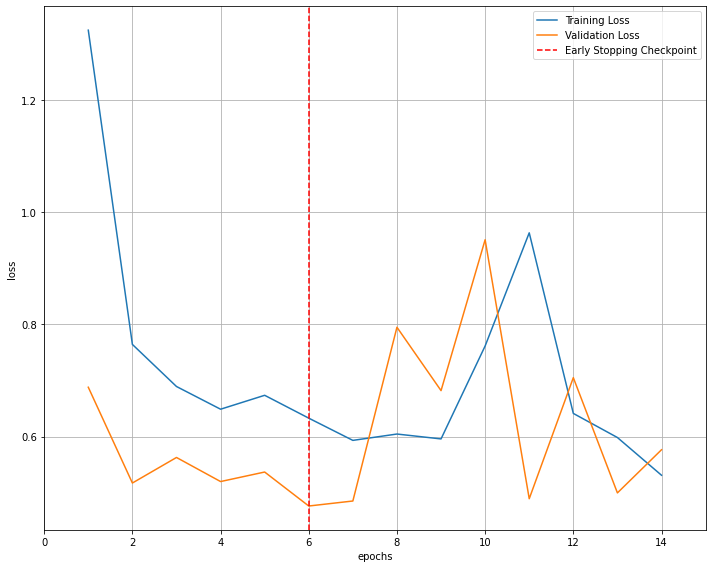

In [ ]:
plot_loss_vs_epoch()

In [ ]:
# Renaming label funtion for showing results:
def rename_label(label):
  if (num_classes == 2):
    if (label == 0):
      return "0|NORMAL"
    return "1|PNEUMONIA"
  else:
    if(label == 0):
      return "0|BACTERIAL"
    elif(label == 1):
      return "1|NORMAL"
  return "2|VIRAL"

# Test on the trained network

In [ ]:
from sklearn.metrics import confusion_matrix

def test_on_trained_network():
  # initialize lists to monitor test loss and accuracy
  pred_tot = []
  tar_tot = []
  test_loss = 0.0
  class_correct = list(0. for i in range(num_classes))
  class_total = list(0. for i in range(num_classes))

  model.eval() # prep model for evaluation

  for data, target in test_loader:
      if len(target.data) != batch_size:
          break
      # forward pass: compute predicted outputs by passing inputs to the model
      output = model(data)
      # calculate the loss
      loss = criterion(output, target)
      # update test loss 
      test_loss += loss.item()*data.size(0)
      # convert output probabilities to predicted class
      _, pred = torch.max(output, 1)

      # Addition for confusion matrix
      tar = (target.data.view_as(pred)).numpy()
      for ele in tar: tar_tot.append(rename_label(ele))
      for ele in pred: pred_tot.append(rename_label(ele))
      #

      # compare predictions to true label
      correct = np.squeeze(pred.eq(target.data.view_as(pred)))
      # calculate test accuracy for each object class
      for i in range(batch_size):
          label = target.data[i]
          class_correct[label] += correct[i].item()
          class_total[label] += 1

  # calculate and print avg test loss
  test_loss = test_loss/len(test_loader.dataset)
  print('Test Loss: {:.6f}\n'.format(test_loss))


  # Build confusion matrix
  cf_matrix = confusion_matrix(tar_tot, pred_tot)
  plt.figure(figsize = (12,7))
  sns.heatmap(cf_matrix, annot=True,cmap = 'Blues').invert_yaxis()
  plt.xlabel("Predicted Class")
  plt.ylabel("Actual Class")
  plt.savefig('output.png')
  #

  #
  for i in range(num_classes):
      if class_total[i] > 0:
          print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
              rename_label(i), 100 * class_correct[i] / class_total[i],
              np.sum(class_correct[i]), np.sum(class_total[i])))
      else:
          print('Test Accuracy: N/A (no training examples)')

  print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
      100. * np.sum(class_correct) / np.sum(class_total),
      np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.508910

Test Accuracy of 0|BACTERIAL: 59% (36/61)
Test Accuracy of 1|NORMAL: 96% (61/63)
Test Accuracy of 2|VIRAL: 69% (47/68)

Test Accuracy (Overall): 75% (144/192)


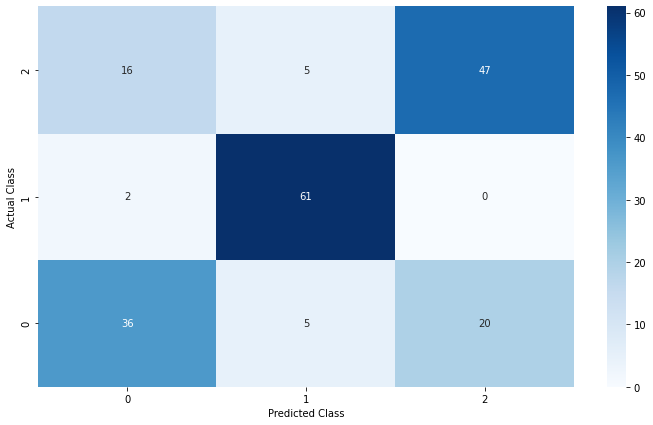

In [ ]:
# execute the test on trained network function
test_on_trained_network()

In [ ]:
# Functions for Visualizing the predictions

def visualize_result():
  # obtain one batch of test images
  dataiter = iter(test_loader)
  images, labels = dataiter.next()

  # get sample outputs
  output = model(images)
  # convert output probabilities to predicted class
  _, preds = torch.max(output, 1)
  # prep images for display
  images = images.numpy()

  # plot the images in the batch, along with predicted and true labels
  fig = plt.figure(figsize=(25, 10))
  for idx in np.arange(10):
      print(images[idx].shape)
      ax = fig.add_subplot(2, 10/2, idx+1, xticks=[], yticks=[])
      ax.imshow(np.squeeze(images[idx].transpose(1,2,0)), cmap='gray')
      ax.set_title("{} ({})".format(rename_label(preds[idx].item()), rename_label(labels[idx].item())),
                  color=("green" if preds[idx]==labels[idx] else "red"))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 64, 64)
(3, 64, 64)
(3, 64, 64)
(3, 64, 64)


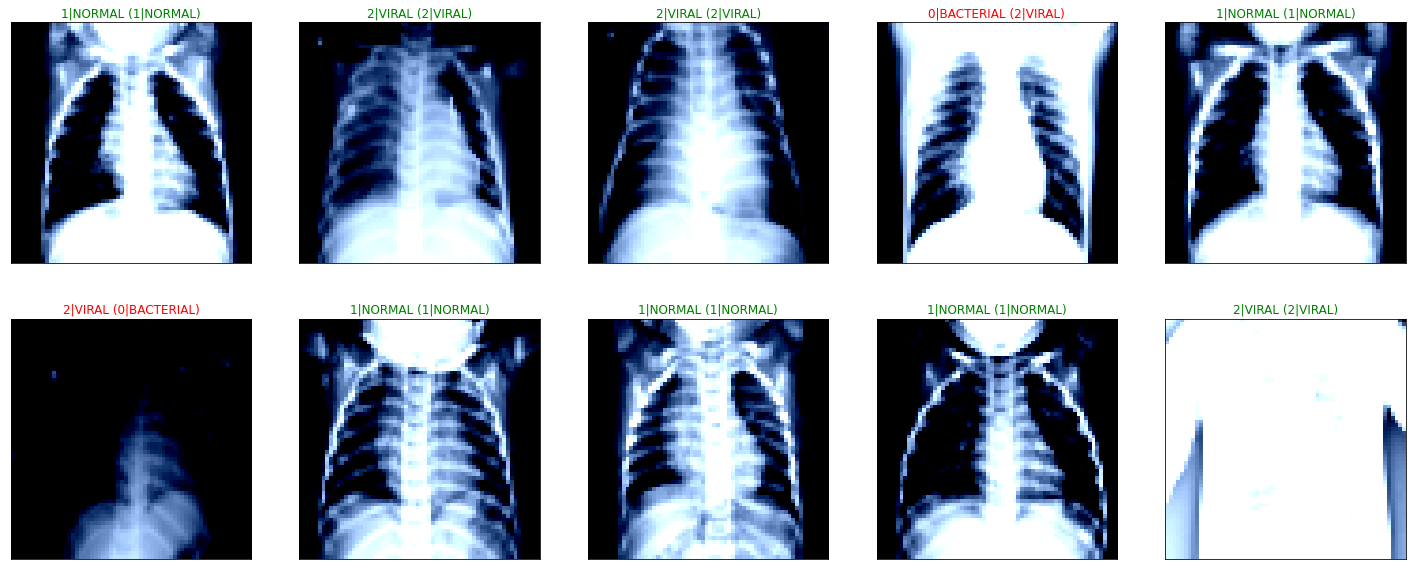

In [ ]:
# execute visualize the result
visualize_result()

# Remarks

The accuracy of the model was in the same range as the simple CNN. The overall **test accuracy** of the model turned out to be **75 %**. Similar result was obtained as with the simple CNN case, in the confusion matrix, the normal classes are still correctly classified as normal and only few pneumonia cases are being classified as normal cases. VGG16 also seems to struggle to classify VIRAL and BACTERIAL cases despite having a higher complexity. It should be noted that the whole feature layer was frozen and only the classifier was allowed to train on the training set. To see if the model can improve its performance by partially freezing the feature layer and allowing some feature layer to train along with the classifier, further test is carried out in part 5. 